#### Title: Milestone 3
#### Author: Jerock Kalala
#### Date: June 2d 2023
#### Modified By: --
#### Walmart_sales_Forecasting

##### Import Python Libraries

In [1]:
#Import libraries
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
%matplotlib inline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

##### Loading the datasets

In [2]:
#Loading the datasets
data1 = pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\Historical Product Demand.csv")
data_store= pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\stores.csv")
data_train= pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\train.csv")
data_test= pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\test.csv")
data_features= pd.read_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Project\\Walmart\\features.csv")

##### Analyse the data

In [3]:
#Let's check the size fo each dataset
print(data_store.shape)
print(data_train.shape)
print(data_test.shape)
print(data_features.shape)

#Let's check the data type
#data_train.info()

(45, 3)
(421570, 5)
(115064, 4)
(8190, 12)


#Merging the datasets (3)

In [4]:
# Assuming that features and stores need to be merged with train and test datasets based on common columns
train = data_train.merge(data_features, on=['Store', 'Date'], how='left')
train = train.merge(data_store, on=['Store'], how='left')
test = data_test.merge(data_features, on=['Store', 'Date'], how='left')
test = test.merge(data_store, on=['Store'], how='left')
print(train.shape, test.shape)

(421570, 17) (115064, 16)


In [5]:
#changing the Date column datatype

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

#### Building prediction model

Dealing with missing values

In [6]:
#We are going to replace missing value with 0
train = train.fillna(0)
test = test.fillna(0)

In [7]:
# Step 3: Train the model and make predictions
X_train2 = train.drop(['Date', 'Weekly_Sales', 'Type', 'IsHoliday_y', 'MarkDown1', 'MarkDown5', 'CPI',
                       'IsHoliday_x', 'Size'], axis=1)
y_train2 = train['Weekly_Sales']

In [8]:
from sklearn.preprocessing import StandardScaler
# Normalizing the features for stable and fast training.

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)

In [9]:
X_train2.shape

(421570, 8)

In [10]:
# Splitting the data into train and validation sets

from sklearn.model_selection import train_test_split
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=42)


In [11]:
print(X_train3.shape, y_train3.shape)
print(X_val3.shape, y_val3.shape)

(337256, 8) (337256,)
(84314, 8) (84314,)


In [12]:
# Training the random forest regressor model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train3, y_train3)

RandomForestRegressor()

In [13]:
import  joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

In [14]:
joblib.dump(model, 'walmart_model.h5')

['walmart_model.h5']

In [15]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [16]:
# Making predictions on the validation set
y_val_pred2 = model.predict(X_val3)
y_val_pred2[:5]

array([47621.7195,  3413.1844, 10512.4463,  3920.988 ,  5355.3223])

In [17]:
# Step 4: Calculate the accuracy of the model
mse = mean_squared_error(y_val3, y_val_pred2)
r2 = r2_score(y_val3, y_val_pred2)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 31197201.993153557
R-squared Score: 0.9401746167682492


In [18]:
# Step 5: Add a column of predicted sales to the original DataFrame
train['Predicted_Sales'] = model.predict(X_train2)

In [19]:
X_test2 = test.drop(['Date', 'Type', 'IsHoliday_y', 'MarkDown1', 'MarkDown5', 'CPI', 'IsHoliday_x', 'Size'], axis=1)
X_test2 = scaler.transform(X_test2)
test['Predicted_Sales'] = model.predict(X_test2)

In [20]:
test.head()

,Store,Dept,Date,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Predicted_Sales
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,False,A,151315,24842.3789
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,False,A,151315,26147.8351
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,False,A,151315,24506.8424
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,True,A,151315,29987.5374
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,False,A,151315,39713.7859


In [29]:
train.to_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Week_12\\train.csv")
test.to_csv("E:\\Bellevue\\Spring_2023\\DSC410_Predictive Analytics\\Week_12\\test.csv")

In [21]:
df_pred = train[['Date', 'Weekly_Sales', 'Predicted_Sales']].copy()

In [22]:
df_pred.head(5)

,Date,Weekly_Sales,Predicted_Sales
0,2010-02-05,24924.50,26097.0504
1,2010-02-12,46039.49,38398.1919
2,2010-02-19,41595.55,42303.0991
3,2010-02-26,19403.54,22121.5681
4,2010-03-05,21827.90,21615.2339


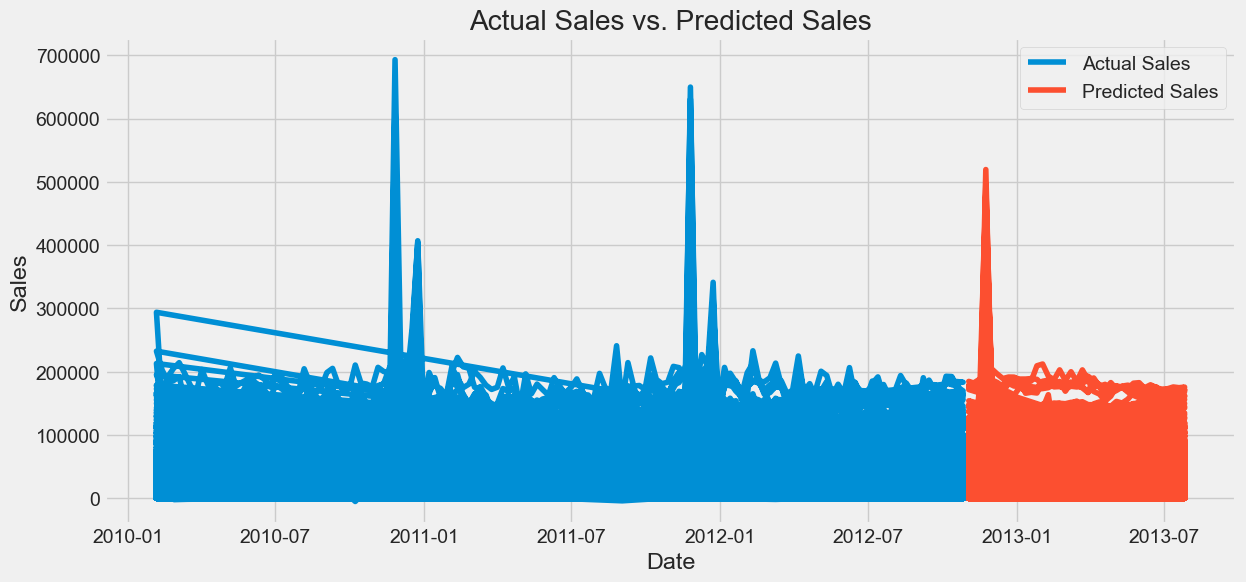

In [40]:
# Step 6: Plot Actual Sales vs. Predicted Sales
fig, ax = plt.subplots(figsize=(13, 6))
plt.plot(train['Date'], train['Weekly_Sales'], label='Actual Sales')
plt.plot(test['Date'], test['Predicted_Sales'], label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual Sales vs. Predicted Sales')
plt.legend()
plt.show()

### BUILDING THE APPLICATION USING DASH

In [41]:
#import libraries
import dash
from dash.dependencies import Input, Output
from dash import Dash, Input, Output, ctx, html, dcc
import plotly.express as px
import plotly.graph_objects as go
from keras.models import load_model
import joblib

In [42]:
loaded_model = joblib.load('model.joblib')

In [43]:
#prediction = loaded_model.predict(X_test2)

In [44]:
app = dash.Dash(__name__)

# Define the layout of the application
app.layout = html.Div([
    html.H1("Walmart Store Sales Prediction"),
    html.Div([
        html.Label("Store:"),
        dcc.Input(id='Store', type='number', placeholder='Enter a value'),
        html.Label("Dept:"),
        dcc.Input(id='Dept', type='number', placeholder='Enter a value'),
        html.Label("Temperature:"),
        dcc.Input(id='Temperature', type='number', placeholder='Enter a value'),
        html.Label("Fuel_Price:"),
        dcc.Input(id='Fuel_Price', type='number', placeholder='Enter a value'),
        html.Label("MarkDown2:"),
        dcc.Input(id='MarkDown2', type='number', placeholder='Enter a value'),
        html.Label("MarkDown3:"),
        dcc.Input(id='MarkDown3', type='number', placeholder='Enter a value'),
        html.Label("MarkDown4:"),
        dcc.Input(id='MarkDown4', type='number', placeholder='Enter a value'),
        html.Label("Unemployment:"),
        dcc.Input(id='Unemployment', type='number', placeholder='Enter a value'),
        html.Button('Predict', id='predict-button'),
        html.Div(id='output')
    ])
])


In [45]:
@app.callback(Output('output', 'children'),
              [Input('predict-button', 'n_clicks')],
              [Input('Store', 'value'),
               Input('Dept', 'value'),
               Input('input1', 'value'),
               Input('input2', 'value'),
               Input('input1', 'value'),
               Input('input2', 'value'),
               Input('input1', 'value'),
               Input('input2', 'value'),
               ])
def predict(n_clicks, Store, Dept, Temperature, Fuel_Price, MarkDown2, MarkDown3, MarkDown4, Unemployment):
    if n_clicks is None:
        return ''

    # Preprocess the inputs if needed
    # Load or initialize the Random Forest model
    # Make predictions
    prediction = loaded_model.predict([[Store, Dept, Temperature, Fuel_Price, MarkDown2, MarkDown3, MarkDown4, Unemployment]])

    # Format and return the prediction result
    return html.H3(f"Prediction: {prediction[0]}")


In [47]:
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


#### Visualization Using DASH

In [35]:
import dash
from dash import dcc, html
import seaborn as sns
import plotly.express as px
import pandas as pd

In [36]:
# Step 1: Initialize the Dash application
app = dash.Dash(__name__)

In [37]:
# Step 2: Define the layout of the application
app.layout = html.Div(
    children=[
        dcc.Graph(
            id='sales-graph',
            figure={
                'data': [
                    {'x': train['Date'], 'y': train['Weekly_Sales'], 'name': 'Actual Sales'},
                    {'x': test['Date'], 'y': test['Predicted_Sales'], 'name': 'Predicted Sales'}
                ],
                'layout': {
                    'xaxis': {'title': 'Date'},
                    'yaxis': {'title': 'Sales'},
                    'title': 'Actual Sales vs. Predicted Sales',
                    'legend': {'x': 0, 'y': 1}
                }
            }
        )
    ]
)

In [39]:
# Step 3: Run the application
if __name__ == '__main__':
    app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off
